# Preprocessing of EEG data

to analyze the EEG data, we want to use the MNE template

In [27]:
import numpy as np
import mne
from mne.channels import make_standard_montage
from mne.io import read_raw_edf
from mne.viz import plot_events 
from mne import find_events



In [4]:
mne.sys_info()

Platform:      Linux-4.4.0-19041-Microsoft-x86_64-with-glibc2.10
Python:        3.8.5 (default, Sep  4 2020, 07:30:14)  [GCC 7.3.0]
Executable:    /home/amstrinzel/miniconda3/bin/python
CPU:           x86_64: 8 cores
Memory:        Unavailable (requires "psutil" package)
mne:           0.23.0
numpy:         1.20.1 {blas=mkl_rt, lapack=mkl_rt}
scipy:         1.6.2
matplotlib:    3.3.4 {backend=module://ipykernel.pylab.backend_inline}

sklearn:       0.24.1
numba:         Not found
nibabel:       3.2.1
nilearn:       0.7.1
dipy:          1.4.1
cupy:          Not found
pandas:        1.2.4
mayavi:        Not found
pyvista:       Not found
vtk:           Not found


In [18]:
fname = "/mnt/c/Users/anna-/Desktop/HC"


In [19]:
data = read_raw_edf(fname + "/s01.edf")

Extracting EDF parameters from /mnt/c/Users/anna-/Desktop/HC/s01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


In [20]:
data.info

<Info | 7 non-empty values
 bads: []
 ch_names: Fp2, F8, T4, T6, O2, Fp1, F7, T3, T5, O1, F4, C4, P4, F3, C3, ...
 chs: 19 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: 2004-08-20 12:19:24 UTC
 nchan: 19
 projs: []
 sfreq: 250.0 Hz
>

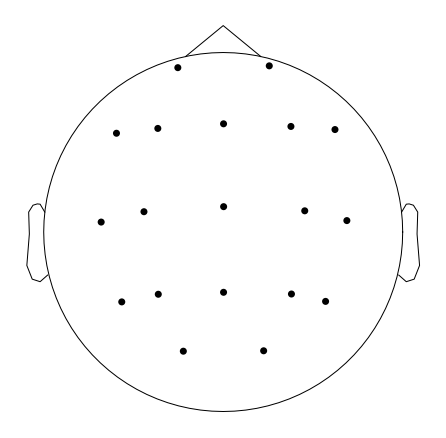

In [29]:
montage = make_standard_montage(kind="standard_1020")
data.set_montage(montage)
data.plot_sensors();

Effective window size : 8.192 (s)


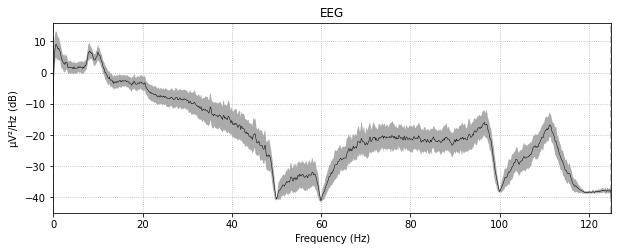

In [31]:
data.plot_psd(average=True);

Effective window size : 8.192 (s)


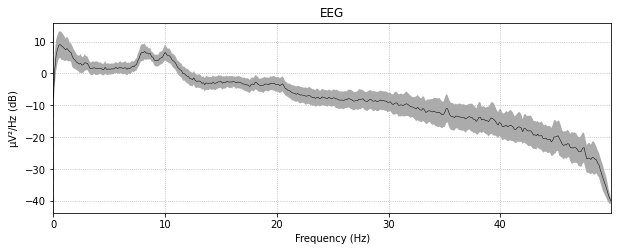

In [33]:
data.plot_psd(average=True,fmax=50);

Effective window size : 8.192 (s)


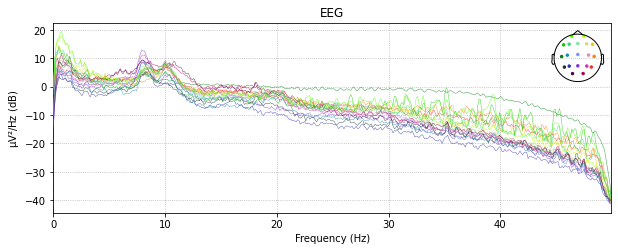

In [34]:
data.plot_psd(average=False, fmax=50);

<IPython.core.display.Javascript object>


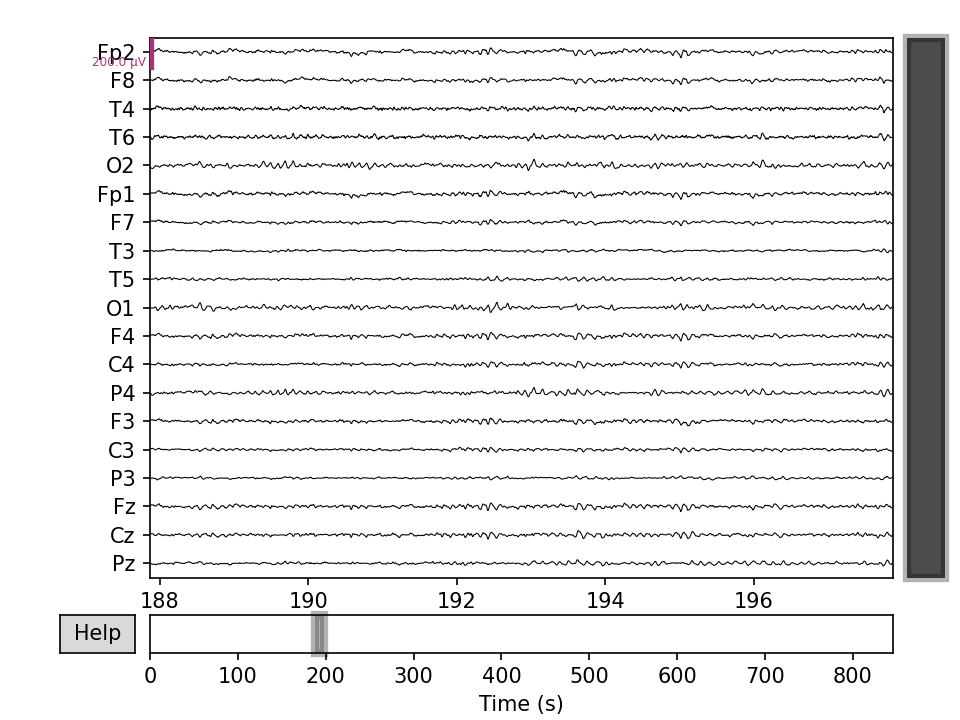

In [37]:
%matplotlib notebook
data.plot(n_channels=19, scalings=dict(eeg=1e-4));

In [41]:
raw = data
raw.load_data()
raw.filter(l_freq=0.5,h_freq=45.0,
filter_length='auto',
l_trans_bandwidth='auto',
h_trans_bandwidth='auto',
method='fir',
phase='zero',
fir_window='hamming',
fir_design='firwin')

Reading 0 ... 211249  =      0.000 ...   844.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (6.604 sec)



<RawEDF | s01.edf, 19 x 211250 (845.0 s), ~30.7 MB, data loaded>